# Import data

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df_train = pd.read_csv('train_all_features.csv')
df_val = pd.read_csv('val_all_features.csv')
df_test = pd.read_csv('test_all_features.csv')

In [3]:
df_train.head(5)

,Unnamed: 0,files,labels,train_or_val,object_count,lum_hist_1,lum_hist_2,lum_hist_3,lum_hist_4,lum_hist_5,...,res_991,res_992,res_993,res_994,res_995,res_996,res_997,res_998,res_999,res_1000
0,0,./seg_train/seg_train/buildings/0.jpg,building,training,5,410,257,331,478,617,...,4.167721e-06,2.158211e-06,5.904865e-07,1.288369e-06,9.919127e-07,1.897755e-05,0.000028,4.818478e-07,8.228128e-06,8.343523e-07
1,1,./seg_train/seg_train/buildings/1001.jpg,building,training,17,508,522,919,1239,1236,...,1.696466e-06,2.202982e-08,1.420953e-08,6.721601e-08,3.885782e-08,1.968007e-07,0.000001,1.973723e-08,6.154577e-07,4.719319e-07
2,2,./seg_train/seg_train/buildings/10014.jpg,building,training,46,451,640,491,586,589,...,9.414865e-07,3.305464e-07,1.655347e-07,2.085787e-08,6.880236e-07,5.563913e-06,0.000012,6.165252e-07,2.910279e-05,1.475344e-06
3,3,./seg_train/seg_train/buildings/10018.jpg,building,training,36,353,226,5700,7166,1368,...,2.472801e-07,2.811269e-07,7.010432e-06,4.059911e-07,3.939365e-06,2.139476e-07,0.000024,6.369614e-08,3.868958e-05,3.412553e-05
4,4,./seg_train/seg_train/buildings/10056.jpg,building,training,40,245,289,453,520,724,...,1.937030e-05,2.277373e-07,3.255058e-07,5.757029e-07,2.479512e-07,8.827865e-06,0.000007,3.589234e-07,5.496050e-06,7.935602e-06


Split training data

In [4]:
df_train['labels_numeric'] = df_train['labels'].map({'building':0,'forest':1,'glacier':2,'mountain':3,'sea':4,'street':5})

In [5]:
# Set y_train
y_train = df_train['labels_numeric']
# Set X_train
X_train = df_train.iloc[:,4:]

Split test data


In [6]:
df_test['labels_numeric'] = df_test['labels'].map({'building':0,'forest':1,'glacier':2,'mountain':3,'sea':4,'street':5})
# Set y_test
y_test = df_test['labels_numeric']
# Set X_test
X_test = df_test.iloc[:,3:]

Split val data

In [7]:
df_val['labels_numeric'] = df_val['labels'].map({'building':0,'forest':1,'glacier':2,'mountain':3,'sea':4,'street':5})
# Set y_val
y_val = df_val['labels_numeric']
# Set X_test
X_val = df_val.iloc[:,4:]

### Standardize the Features and Apply PCA

In [8]:
import warnings
warnings.filterwarnings('ignore')

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

# # Apply PCA
# pca = PCA(n_components=0.80)  # retaining 80% variance
# X_train_pca = pca.fit_transform(X_train_scaled)
# X_test_pca = pca.transform(X_test_scaled)
# X_val_pca = pca.transform(X_val_scaled)


# Logistic Regression Models with and without PCA

### Model without PCA

In [32]:
# Logistic Regression (One Vs Rest Strategy)
model_ovr = LogisticRegression(multi_class='ovr', max_iter=1000)
model_ovr.fit(X_train, y_train)

# Make predictions and calculate accuracy
y_pred_ovr = model_ovr.predict(X_test)
accuracy_ovr = accuracy_score(y_test, y_pred_ovr)
print(f"Accuracy (One Vs Rest, No PCA): {accuracy_ovr}")

Accuracy (One Vs Rest, No PCA): 0.8543333333333333


In [33]:
# Logistic Regression (Multinomial)
model_multi = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
model_multi.fit(X_train, y_train)

# Make predictions and calculate accuracy
y_pred_multi = model_multi.predict(X_test)
accuracy_multi = accuracy_score(y_test, y_pred_multi)
print(f"Accuracy (Multinomial, No PCA): {accuracy_multi}")

Accuracy (Multinomial, No PCA): 0.648


### Model with PCA

In [34]:
# Logistic Regression with PCA (One Vs Rest Strategy)
model_ovr_pca = LogisticRegression(multi_class='ovr', max_iter=1000)
model_ovr_pca.fit(X_train_pca, y_train)

# Make predictions and calculate accuracy
y_pred_ovr_pca = model_ovr_pca.predict(X_test_pca)
accuracy_ovr_pca = accuracy_score(y_test, y_pred_ovr_pca)
print(f"Accuracy (One Vs Rest, PCA): {accuracy_ovr_pca}")

Accuracy (One Vs Rest, PCA): 0.8523333333333334


In [42]:
# Logistic Regression with PCA (Multinomial)
model_multi_pca = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
model_multi_pca.fit(X_train_pca, y_train)

# Make predictions and calculate accuracy
y_pred_multi_pca = model_multi_pca.predict(X_test_pca)
accuracy_multi_pca = accuracy_score(y_test, y_pred_multi_pca)
print(f"Accuracy (Multinomial, PCA): {accuracy_multi_pca}")


Accuracy (Multinomial, PCA): 0.8286666666666667


## Visulization

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [37]:
# Function to plot and save cm
def plot_confusion_matrix(y_true, y_pred, title, filename):
    cm = confusion_matrix(y_true, y_pred)
    y = df_train['labels'].unique()
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
    plt.title(title)
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.savefig(filename, bbox_inches='tight') 
    plt.show()

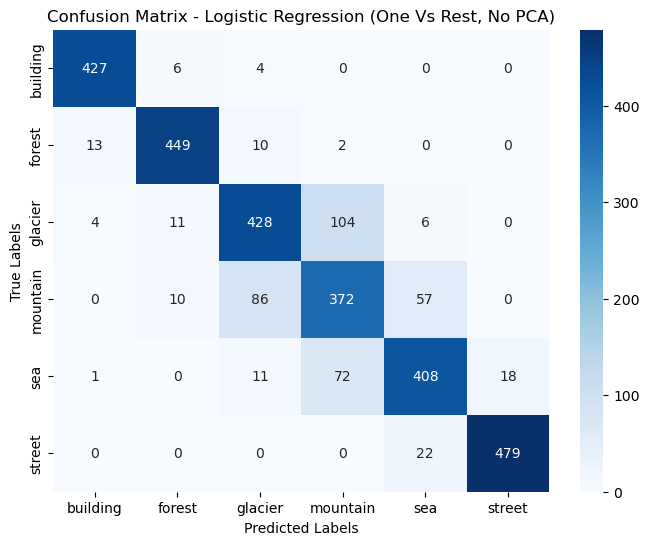

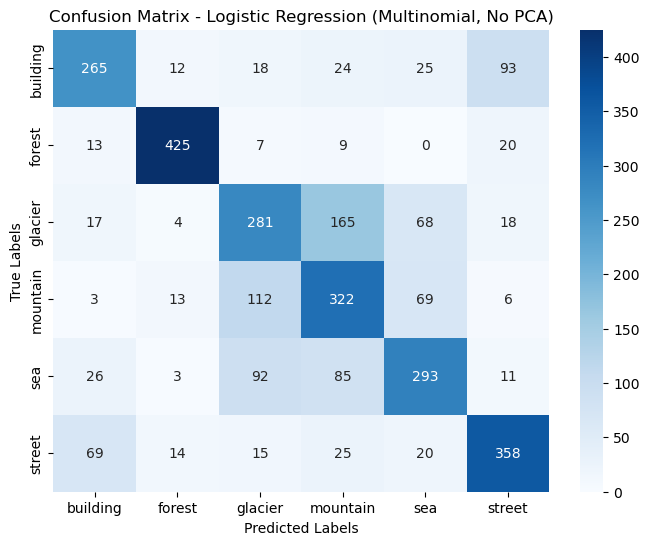

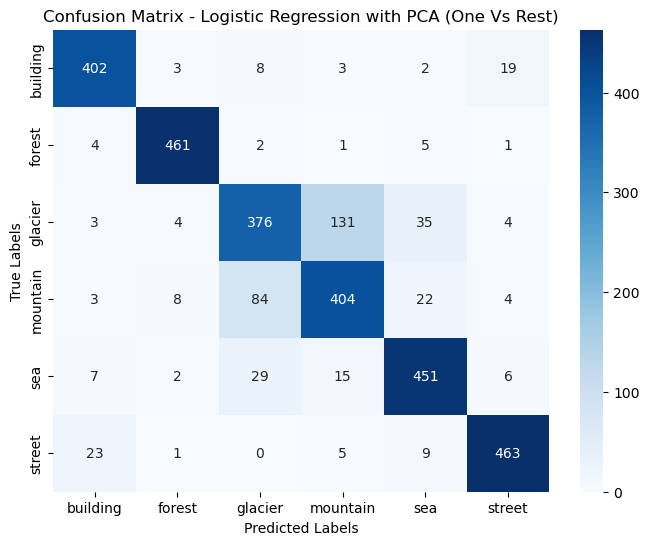

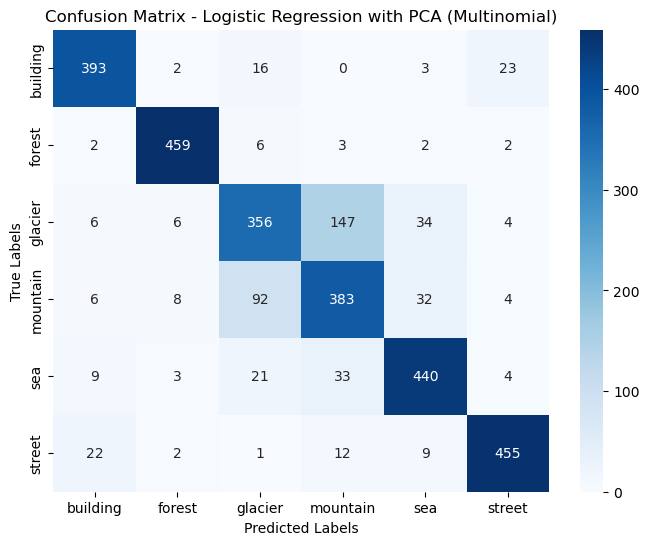

In [38]:
# Plot and save confusion matrices
plot_confusion_matrix(y_test, y_pred_ovr, "Confusion Matrix - Logistic Regression (One Vs Rest, No PCA)", "cm_one_vs_rest_no_pca.png")
plot_confusion_matrix(y_test, y_pred_multi, "Confusion Matrix - Logistic Regression (Multinomial, No PCA)", "cm_multinomial_no_pca.png")
plot_confusion_matrix(y_test, y_pred_ovr_pca, "Confusion Matrix - Logistic Regression with PCA (One Vs Rest)", "cm_one_vs_rest_pca.png")
plot_confusion_matrix(y_test, y_pred_multi_pca, "Confusion Matrix - Logistic Regression with PCA (Multinomial)", "cm_multinomial_pca.png")


# Random Forest Models with and without PCA

### Model without PCA

In [40]:
# Train the Random Forest model without PCA
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Calculate and print the accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Accuracy (Random Forest, No PCA): {accuracy_rf}')

Accuracy (Random Forest, No PCA): 0.917


### Model with PCA

In [41]:
# Train the Random Forest model with PCA-transformed data
rf_model_pca = RandomForestClassifier()
rf_model_pca.fit(X_train_pca, y_train)

# Predict on the test set transformed by PCA
y_pred_rf_pca = rf_model_pca.predict(X_test_pca)

# Calculate and print the accuracy
accuracy_rf_pca = accuracy_score(y_test, y_pred_rf_pca)
print(f'Accuracy (Random Forest, PCA): {accuracy_rf_pca}')

Accuracy (Random Forest, PCA): 0.6973333333333334


## Visulization

In [43]:
def plot_confusion_matrix_rf(cm, classes, title, filename):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.savefig(filename)  
    plt.show()

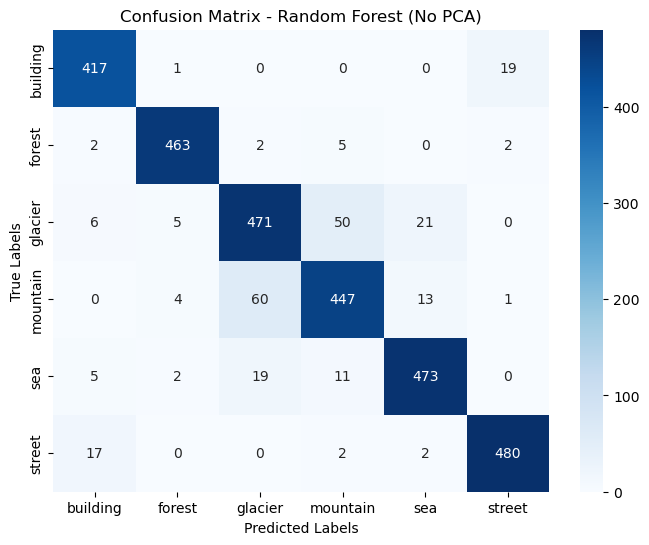

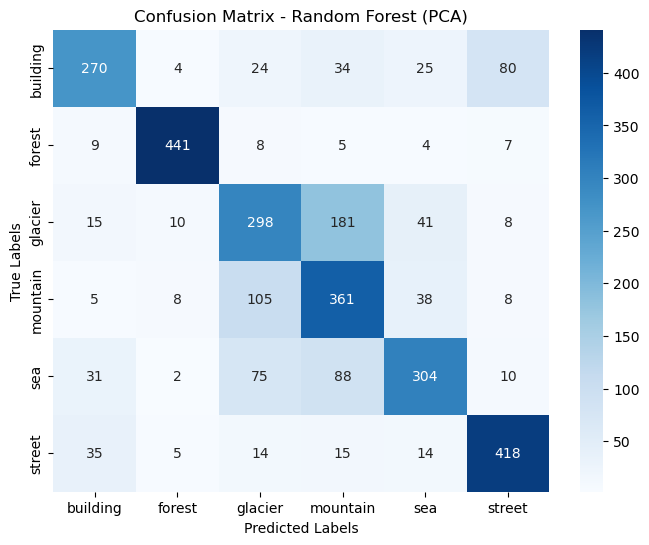

In [46]:
# Plot and save confusion matrices
cm_rf = confusion_matrix(y_test, y_pred_rf)
plot_confusion_matrix_rf(cm_rf, df_train['labels'].unique(), 'Confusion Matrix - Random Forest (No PCA)', 'cm_rf_no_pca.png')
cm_rf_pca = confusion_matrix(y_test, y_pred_rf_pca)
plot_confusion_matrix_rf(cm_rf_pca, df_train['labels'].unique(), 'Confusion Matrix - Random Forest (PCA)', 'cm_rf_pca.png')

# Testing different n_components

In [12]:
n_components_list = [0.01, 0.1, 0.25, 0.5, 0.9]

# Initialize a dictionary
accuracies = {
    'Logistic Regression (One Vs Rest)': [],
    'Logistic Regression (Multinomial)': [],
    'Logistic Regression with PCA (One Vs Rest)': {},
    'Logistic Regression with PCA (Multinomial)': {},
    'Random Forest with PCA': {}
}

# Logistic Regression (One Vs Rest Strategy) without PCA
model_ovr = LogisticRegression(multi_class='ovr', max_iter=1000)
model_ovr.fit(X_train, y_train)
y_pred_ovr = model_ovr.predict(X_test)
accuracies['Logistic Regression (One Vs Rest)'] = accuracy_score(y_test, y_pred_ovr)

# Logistic Regression (Multinomial) without PCA
model_multi = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
model_multi.fit(X_train, y_train)
y_pred_multi = model_multi.predict(X_test)
accuracies['Logistic Regression (Multinomial)'] = accuracy_score(y_test, y_pred_multi)

# Apply PCA with different n_components, train and evaluate models
for n_components in n_components_list:
    # Apply PCA
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)
    
    # Logistic Regression (One Vs Rest Strategy) with PCA
    model_ovr_pca = LogisticRegression(multi_class='ovr', max_iter=1000)
    model_ovr_pca.fit(X_train_pca, y_train)
    y_pred_ovr_pca = model_ovr_pca.predict(X_test_pca)
    accuracies['Logistic Regression with PCA (One Vs Rest)'][n_components] = accuracy_score(y_test, y_pred_ovr_pca)

    # Logistic Regression (Multinomial) with PCA
    model_multi_pca = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
    model_multi_pca.fit(X_train_pca, y_train)
    y_pred_multi_pca = model_multi_pca.predict(X_test_pca)
    accuracies['Logistic Regression with PCA (Multinomial)'][n_components] = accuracy_score(y_test, y_pred_multi_pca)
    
    # Random Forest with PCA
    rf_model_pca = RandomForestClassifier()
    rf_model_pca.fit(X_train_pca, y_train)
    y_pred_rf_pca = rf_model_pca.predict(X_test_pca)
    accuracies['Random Forest with PCA'][n_components] = accuracy_score(y_test, y_pred_rf_pca)

# Print out the accuracies for each model
for model, accuracy in accuracies.items():
    if isinstance(accuracy, dict):
        print(f"{model}:")
        for n_component, acc in accuracy.items():
            print(f"  n_components={n_component}: Accuracy={acc}")
    else:
        print(f"{model}: Accuracy={accuracy}")


Logistic Regression (One Vs Rest): Accuracy=0.8543333333333333
Logistic Regression (Multinomial): Accuracy=0.648
Logistic Regression with PCA (One Vs Rest):
  n_components=0.01: Accuracy=0.411
  n_components=0.1: Accuracy=0.5833333333333334
  n_components=0.25: Accuracy=0.7166666666666667
  n_components=0.5: Accuracy=0.8536666666666667
  n_components=0.9: Accuracy=0.849
Logistic Regression with PCA (Multinomial):
  n_components=0.01: Accuracy=0.3963333333333333
  n_components=0.1: Accuracy=0.596
  n_components=0.25: Accuracy=0.7326666666666667
  n_components=0.5: Accuracy=0.8426666666666667
  n_components=0.9: Accuracy=0.8383333333333334
Random Forest with PCA:
  n_components=0.01: Accuracy=0.31033333333333335
  n_components=0.1: Accuracy=0.584
  n_components=0.25: Accuracy=0.732
  n_components=0.5: Accuracy=0.7563333333333333
  n_components=0.9: Accuracy=0.6763333333333333
